Exploratory Data Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
df=pd.read_csv("../dataset/cleaned_data.csv")
df.head()


,team,opponent,homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,opGoal,session,corner,opcorner,id,result
0,Newcastle United,Everton,50.0,50.0,13,6,17,5,1,2,2012-2013 Barclays Premier League,4,6,345665,0
1,Wigan Athletic,Manchester United,53.0,47.0,15,7,8,0,0,4,2012-2013 Barclays Premier League,1,6,345667,0
2,Southampton,Arsenal,44.0,56.0,6,1,9,5,1,1,2012-2013 Barclays Premier League,3,3,345889,1
3,Liverpool,Sunderland,66.0,34.0,8,2,29,10,3,0,2012-2013 Barclays Premier League,9,5,345671,3
4,Chelsea,Southampton,58.0,42.0,6,2,18,3,2,2,2012-2013 Barclays Premier League,4,3,345893,1


Brief information about data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            3764 non-null   object 
 1   opponent        3764 non-null   object 
 2   homePct(%)      3764 non-null   float64
 3   awayPct(%)      3764 non-null   float64
 4   awayShot        3764 non-null   int64  
 5   awayShotOnGoal  3764 non-null   int64  
 6   homeShot        3764 non-null   int64  
 7   homeShotOnGoal  3764 non-null   int64  
 8   goal            3764 non-null   int64  
 9   opGoal          3764 non-null   int64  
 10  session         3764 non-null   object 
 11  corner          3764 non-null   int64  
 12  opcorner        3764 non-null   int64  
 13  id              3764 non-null   int64  
 14  result          3764 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 441.2+ KB


In [21]:
df.describe()

,homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,opGoal,corner,opcorner,id,result
count,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000
mean,51.206260,48.793472,11.354942,3.901435,13.946334,4.700584,1.520723,1.216525,5.789851,4.685175,484156.764081,1.576249
std,12.098014,12.097888,5.004378,2.325061,5.819208,2.659504,1.317454,1.183927,3.134795,2.755418,86209.289465,1.332869
min,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,345527.000000,0.000000
25%,43.000000,39.000000,8.000000,2.000000,10.000000,3.000000,1.000000,0.000000,4.000000,3.000000,422285.750000,0.000000
50%,51.000000,49.000000,11.000000,4.000000,13.000000,4.000000,1.000000,1.000000,5.000000,4.000000,480707.500000,1.000000
75%,61.000000,57.000000,14.000000,5.000000,17.000000,6.000000,2.000000,2.000000,8.000000,6.000000,541827.250000,3.000000
max,83.000000,82.000000,38.000000,15.000000,43.000000,17.000000,9.000000,9.000000,19.000000,19.000000,638258.000000,3.000000


when a football club play at home, the goal, shot, possesion or shot on goal always better than away match.

<AxesSubplot: >

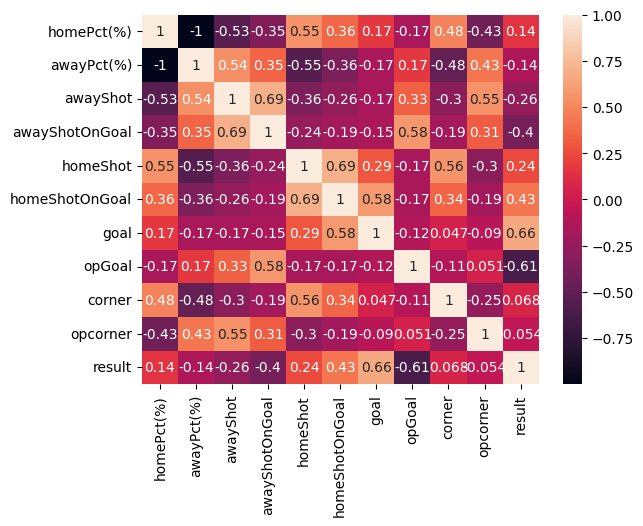

In [22]:
cols= ['homePct(%)','awayPct(%)','awayShot','awayShotOnGoal','homeShot','homeShotOnGoal','goal','opGoal','corner','opcorner','result']
infor=df[cols]
sns.heatmap(infor.corr(), annot=True)

we can drop corner and opcorner when we consider result

array([[<AxesSubplot: xlabel='homePct(%)', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='awayPct(%)', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='awayShot', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='awayShotOnGoal', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='homeShot', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='homeShotOnGoal', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='goal', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='opGoal', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='corner', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='opcorner', ylabel='homePct(%)'>,
        <AxesSubplot: xlabel='result', ylabel='homePct(%)'>],
       [<AxesSubplot: xlabel='homePct(%)', ylabel='awayPct(%)'>,
        <AxesSubplot: xlabel='awayPct(%)', ylabel='awayPct(%)'>,
        <AxesSubplot: xlabel='awayShot', ylabel='awayPct(%)'>,
        <AxesSubplot: xlabel='awayShotOnGoal', ylabel='awayPct(%)'>,
        <AxesSubplot: xlabel='homeShot

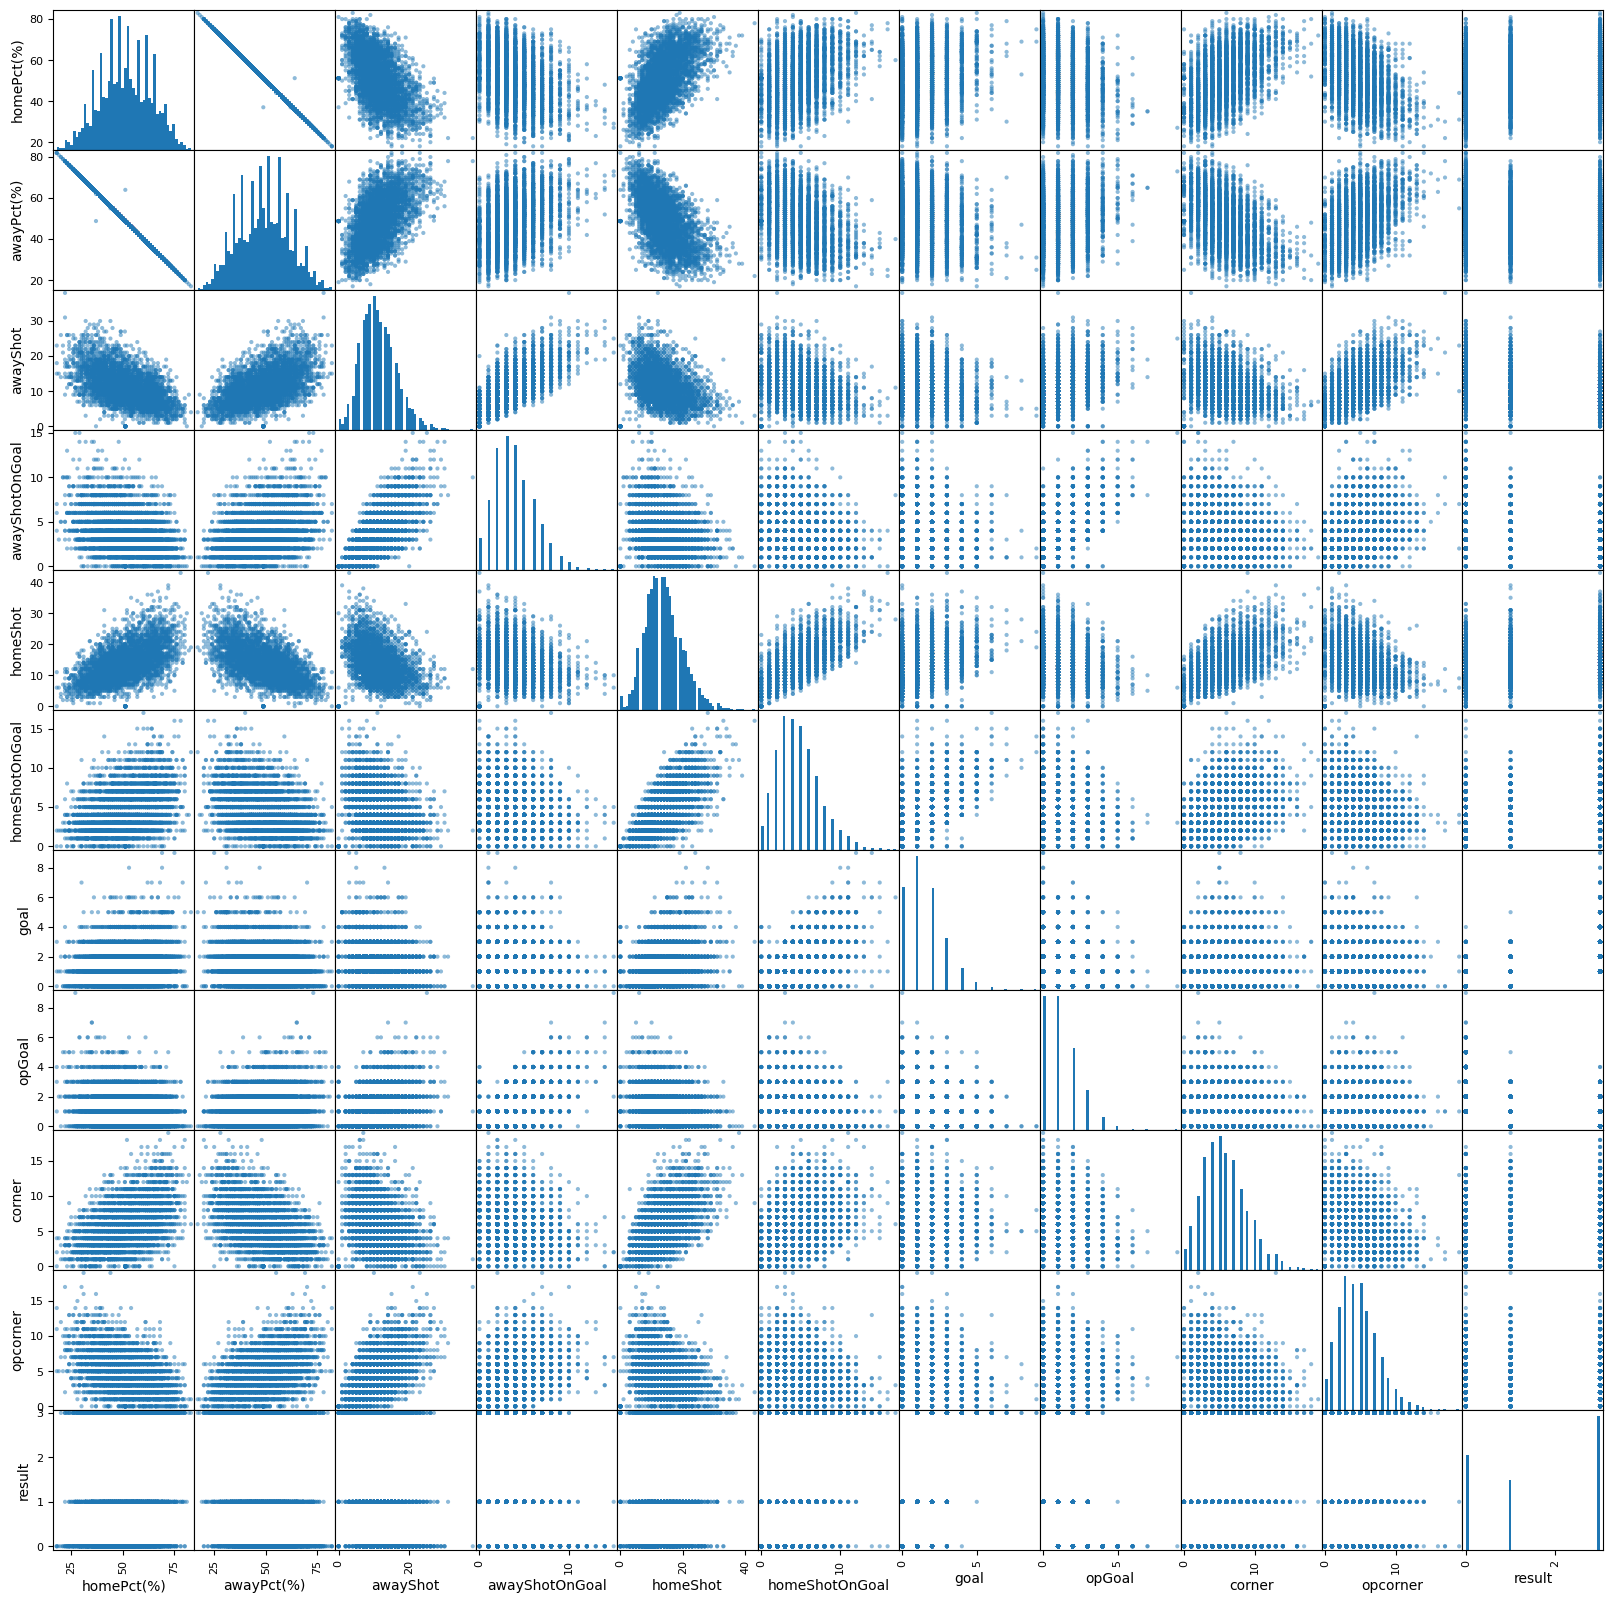

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(infor, figsize=(20, 20), hist_kwds={'bins': 50})

array([[<AxesSubplot: title={'center': 'homePct(%)'}>,
        <AxesSubplot: title={'center': 'awayPct(%)'}>,
        <AxesSubplot: title={'center': 'awayShot'}>],
       [<AxesSubplot: title={'center': 'awayShotOnGoal'}>,
        <AxesSubplot: title={'center': 'homeShot'}>,
        <AxesSubplot: title={'center': 'homeShotOnGoal'}>],
       [<AxesSubplot: title={'center': 'goal'}>,
        <AxesSubplot: title={'center': 'opGoal'}>,
        <AxesSubplot: title={'center': 'corner'}>],
       [<AxesSubplot: title={'center': 'opcorner'}>,
        <AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'result'}>]], dtype=object)

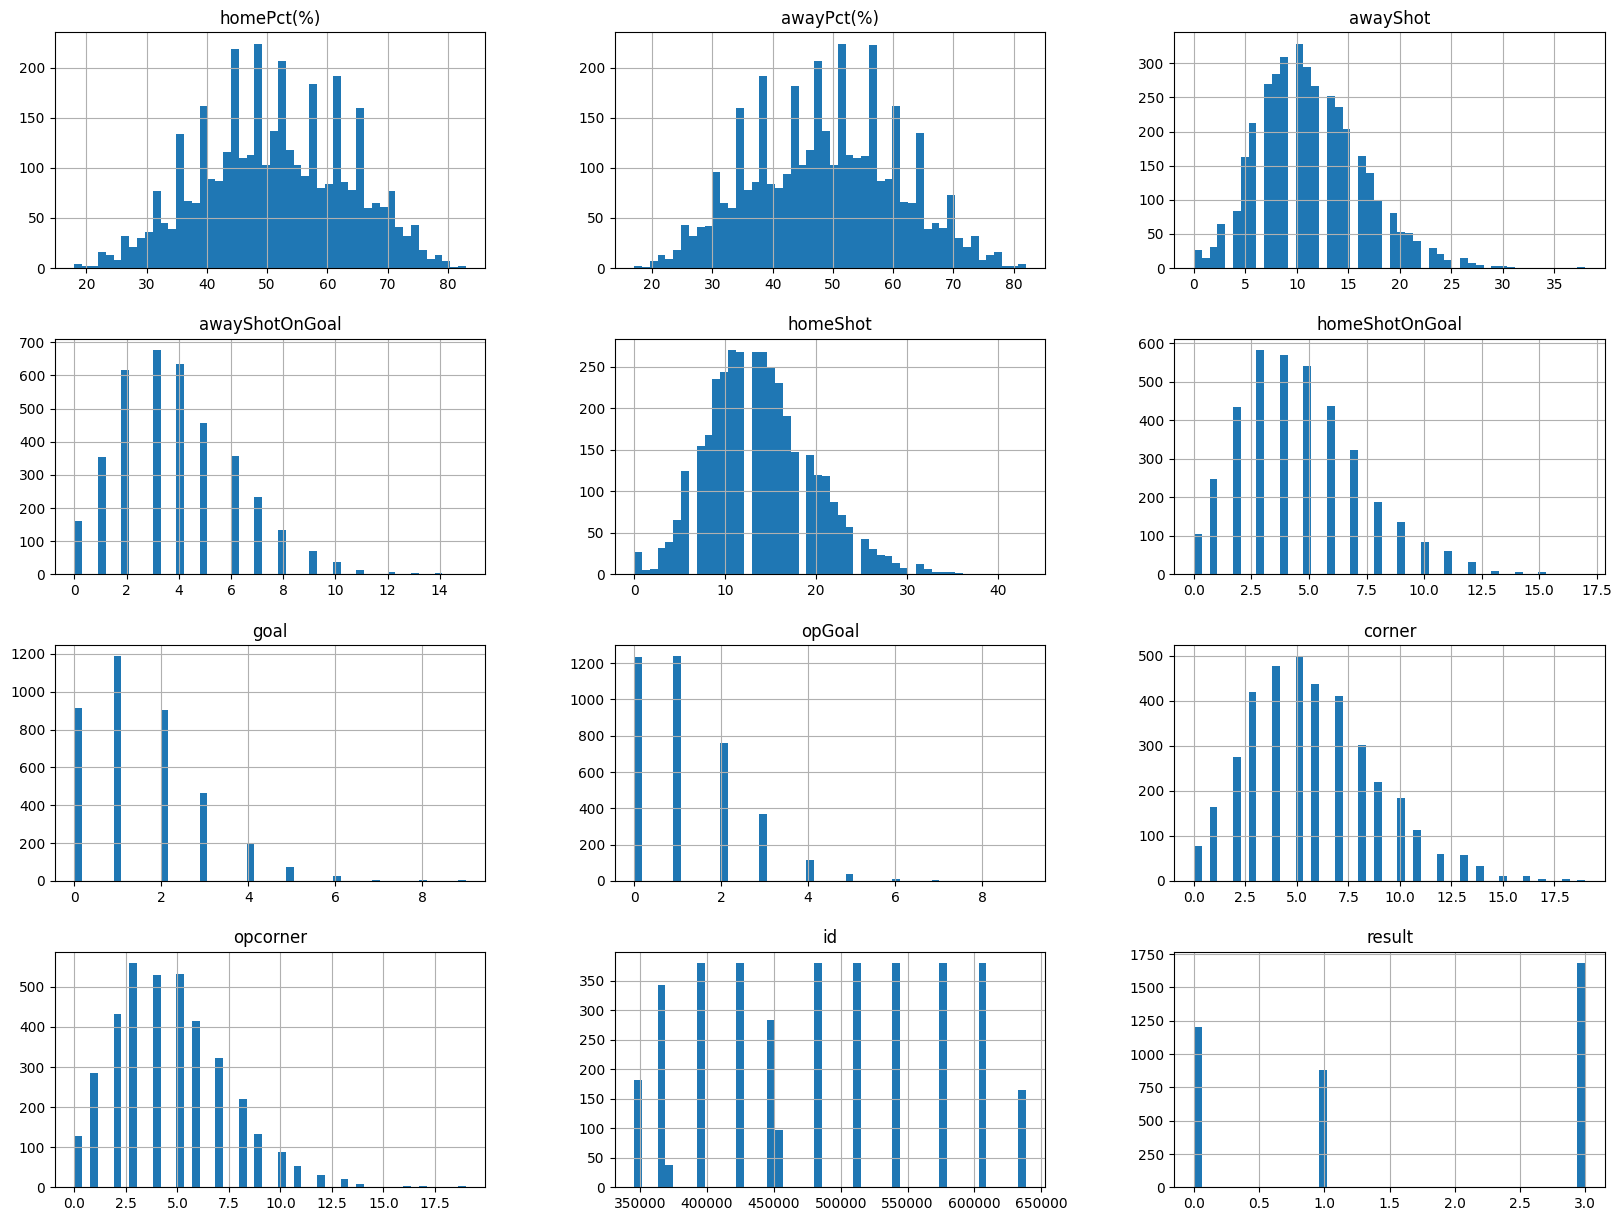

In [24]:
df.hist(bins=50, figsize=(20, 15))

at home the number of 3 points(win) better than away

Top correlation with result

In [25]:
df.corr()['result'].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7544\1121127450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['result'].sort_values(ascending=False)


result            1.000000
goal              0.657034
homeShotOnGoal    0.427052
homeShot          0.241733
homePct(%)        0.143353
corner            0.068106
id               -0.026904
opcorner         -0.053918
awayPct(%)       -0.143846
awayShot         -0.259757
awayShotOnGoal   -0.396021
opGoal           -0.614953
Name: result, dtype: float64

In [26]:
df

,team,opponent,homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,opGoal,session,corner,opcorner,id,result
0,Newcastle United,Everton,50.0,50.0,13,6,17,5,1,2,2012-2013 Barclays Premier League,4,6,345665,0
1,Wigan Athletic,Manchester United,53.0,47.0,15,7,8,0,0,4,2012-2013 Barclays Premier League,1,6,345667,0
2,Southampton,Arsenal,44.0,56.0,6,1,9,5,1,1,2012-2013 Barclays Premier League,3,3,345889,1
3,Liverpool,Sunderland,66.0,34.0,8,2,29,10,3,0,2012-2013 Barclays Premier League,9,5,345671,3
4,Chelsea,Southampton,58.0,42.0,6,2,18,3,2,2,2012-2013 Barclays Premier League,4,3,345893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,Brighton & Hove Albion,Arsenal,68.0,32.0,14,7,9,5,2,4,2022-23 English Premier League,7,4,637997,0
3760,Manchester City,Everton,74.0,26.0,2,1,16,3,1,1,2022-23 English Premier League,7,1,637994,1
3761,Fulham,Southampton,62.0,38.0,9,3,8,2,2,1,2022-23 English Premier League,4,4,637996,3
3762,Newcastle United,Leeds United,59.0,41.0,8,1,16,5,0,0,2022-23 English Premier League,9,3,637998,1


Make mean of 10 match later( home team from home matchs and away team from away matchs)

In [27]:
df1 = df.copy()

gk = df.groupby("team")
for team in df1['team'].unique():
    temp = gk.get_group(team).sort_values("id", ascending = True)
    df1.loc[temp.index, ['mean10Goal']] = temp.rolling(10, min_periods=0)['goal'].mean()
    df1.loc[temp.index, ['mean10HomePct']] = temp.rolling(10, min_periods=0)['homePct(%)'].mean()
    df1.loc[temp.index, ['mean10HomeShotGoal']] = temp.rolling(10, min_periods=0)['homeShotOnGoal'].mean()
    df1.loc[temp.index, ['mean10HomeShot']] = temp.rolling(10, min_periods=0)['homeShot'].mean()
    df1.loc[temp.index, ['mean10Corner']] = temp.rolling(10, min_periods=0)['corner'].mean()

gk = df.groupby("opponent")
for team in df1['opponent'].unique():
    temp = gk.get_group(team).sort_values("id", ascending = True)
    df1.loc[temp.index, ['mean10OpGoal']] = temp.rolling(10, min_periods=0)['opGoal'].mean()
    df1.loc[temp.index, ['mean10AwayPct']] = temp.rolling(10, min_periods=0)['awayPct(%)'].mean()
    df1.loc[temp.index, ['mean10AwayShotGoal']] = temp.rolling(10, min_periods=0)['awayShotOnGoal'].mean()
    df1.loc[temp.index, ['mean10AwayShot']] = temp.rolling(10, min_periods=0)['awayShot'].mean()
    df1.loc[temp.index, ['mean10OpCorner']] = temp.rolling(10, min_periods=0)['opcorner'].mean()
df1
# corr, _ = pearsonr(df1['mean10OpGoal'], df1['result'])
# print('Pearsons correlation: %.3f' % corr)

,team,opponent,homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,opGoal,...,mean10Goal,mean10HomePct,mean10HomeShotGoal,mean10HomeShot,mean10Corner,mean10OpGoal,mean10AwayPct,mean10AwayShotGoal,mean10AwayShot,mean10OpCorner
0,Newcastle United,Everton,50.0,50.0,13,6,17,5,1,2,...,1.000000,53.142857,4.714286,17.000000,7.428571,0.857143,51.714286,3.714286,12.857143,6.000000
1,Wigan Athletic,Manchester United,53.0,47.0,15,7,8,0,0,4,...,1.375000,53.000000,4.500000,14.375000,5.375000,2.111111,55.777778,5.555556,13.222222,5.222222
2,Southampton,Arsenal,44.0,56.0,6,1,9,5,1,1,...,1.333333,54.777778,5.555556,15.444444,6.222222,1.222222,55.333333,4.555556,12.000000,5.111111
3,Liverpool,Sunderland,66.0,34.0,8,2,29,10,3,0,...,2.111111,59.444444,7.444444,22.555556,8.777778,1.250000,38.000000,3.125000,9.625000,4.250000
4,Chelsea,Southampton,58.0,42.0,6,2,18,3,2,2,...,1.900000,54.300000,6.600000,21.100000,7.200000,1.100000,54.200000,3.900000,13.100000,5.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,Brighton & Hove Albion,Arsenal,68.0,32.0,14,7,9,5,2,4,...,1.200000,56.900000,4.500000,13.800000,7.100000,1.300000,50.900000,3.600000,12.000000,3.700000
3760,Manchester City,Everton,74.0,26.0,2,1,16,3,1,1,...,2.900000,66.900000,5.700000,18.600000,8.100000,0.800000,40.979347,2.800000,8.600000,3.000000
3761,Fulham,Southampton,62.0,38.0,9,3,8,2,2,1,...,1.200000,55.300000,4.200000,13.600000,5.800000,0.700000,45.300000,2.900000,9.700000,3.400000
3762,Newcastle United,Leeds United,59.0,41.0,8,1,16,5,0,0,...,1.900000,49.500000,4.800000,14.900000,5.900000,1.100000,50.300000,3.800000,11.800000,3.700000


drop column ID and homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,opGoal,session,corner,opcorner

In [28]:
df1.drop(['team','opponent','homePct(%)','awayPct(%)','awayShot','awayShotOnGoal','homeShot','homeShotOnGoal','goal','opGoal','session','corner','opcorner','id'],axis=1,inplace=False)


,result,mean10Goal,mean10HomePct,mean10HomeShotGoal,mean10HomeShot,mean10Corner,mean10OpGoal,mean10AwayPct,mean10AwayShotGoal,mean10AwayShot,mean10OpCorner
0,0,1.000000,53.142857,4.714286,17.000000,7.428571,0.857143,51.714286,3.714286,12.857143,6.000000
1,0,1.375000,53.000000,4.500000,14.375000,5.375000,2.111111,55.777778,5.555556,13.222222,5.222222
2,1,1.333333,54.777778,5.555556,15.444444,6.222222,1.222222,55.333333,4.555556,12.000000,5.111111
3,3,2.111111,59.444444,7.444444,22.555556,8.777778,1.250000,38.000000,3.125000,9.625000,4.250000
4,1,1.900000,54.300000,6.600000,21.100000,7.200000,1.100000,54.200000,3.900000,13.100000,5.200000
...,...,...,...,...,...,...,...,...,...,...,...
3759,0,1.200000,56.900000,4.500000,13.800000,7.100000,1.300000,50.900000,3.600000,12.000000,3.700000
3760,1,2.900000,66.900000,5.700000,18.600000,8.100000,0.800000,40.979347,2.800000,8.600000,3.000000
3761,3,1.200000,55.300000,4.200000,13.600000,5.800000,0.700000,45.300000,2.900000,9.700000,3.400000
3762,1,1.900000,49.500000,4.800000,14.900000,5.900000,1.100000,50.300000,3.800000,11.800000,3.700000


Top correlation with result

In [29]:
df1.corr()['result'].sort_values(ascending=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7544\52632382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['result'].sort_values(ascending=False)


result                1.000000
goal                  0.657034
homeShotOnGoal        0.427052
mean10Goal            0.373558
mean10HomeShotGoal    0.314642
mean10HomeShot        0.248809
mean10HomePct         0.248079
homeShot              0.241733
mean10Corner          0.184606
homePct(%)            0.143353
corner                0.068106
id                   -0.026904
opcorner             -0.053918
awayPct(%)           -0.143846
mean10OpCorner       -0.173162
mean10AwayShot       -0.238252
mean10AwayPct        -0.250496
awayShot             -0.259757
mean10AwayShotGoal   -0.265430
mean10OpGoal         -0.315790
awayShotOnGoal       -0.396021
opGoal               -0.614953
Name: result, dtype: float64

Drop column team,opponent,homePct(%),awayPct(%),awayShot,awayShotOnGoal,homeShot,homeShotOnGoal,goal,otepGoal,session,corner,opcorner,id

In [30]:
df1.drop(['team','opponent','homePct(%)','awayPct(%)','awayShot','awayShotOnGoal','homeShot','homeShotOnGoal','goal','opGoal','session','corner','opcorner','id'],axis=1,inplace=True)
df1.to_csv("../dataset/dataEDA.csv",index=False)

Make all different of parameter column

In [ ]:
df1['difGoal']=df1['mean10Goal']-df1['mean10OpGoal']
df1['difPct']=df1['mean10HomePct']-df1['mean10AwayPct']
df1['difShotGoal']=df1['mean10HomeShotGoal']-df1['mean10AwayShotGoal']
df1['difShot']=df1['mean10HomeShot']-df1['mean10AwayShot']
df1['difCorner']=df1['mean10Corner']-df1['mean10OpCorner']

In [31]:
df1.drop(['mean10Goal','mean10HomePct','mean10HomeShotGoal','mean10HomeShot','mean10Corner','mean10OpGoal','mean10AwayPct','mean10AwayShotGoal','mean10AwayShot','mean10OpCorner'],axis=1,inplace=True)
df1.to_csv("../dataset/dataDiff.csv",index=False)